data training example

In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
infile = 'jma_nitrate.csv'
#####
jma_df = pd.read_csv(infile, sep = (','))

#end teh cell by visualizing teh data variable, if that is what you called it, axampe:
jma_df.head()


,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,date,year,month,day,profile,cruise,vessel,density
0,0,25.8807,34.0215,0,0.09,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.228287
1,1,25.8993,34.0217,13,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.222695
2,2,25.8843,34.0196,27,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.225773
3,3,25.9894,34.2936,51,0.48,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.395633
4,4,23.6146,34.5002,75,2.71,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,23.263277


In [9]:
#import teh jma nitrate file, then get columns I want for the training
nitratefile = jma_df
nitratefilefiltered = nitratefile[nitratefile.nitrate>0]
X = nitratefilefiltered[['sal','theta']]
Y = nitratefilefiltered['nitrate']
print(np.shape(X))
print(np.shape(Y))

#split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

(15574, 2)
(15574,)


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

layers_saved = []
results = []
for nodes in range(7,10,1):
    for layers in range(7,10,1):   
        layers_saved.append(nodes)

        mlp = MLPRegressor(hidden_layer_sizes=layers_saved, max_iter=500, random_state=4)
        mlp.fit(X_train, Y_train)
        trainres = mlp.score(X_train, Y_train)
        Predictions = mlp.predict(X_test)
        accresults = mlp.score(X_test, Y_test)
        res = [nodes, layers, trainres, accresults]
        results.append(res)
    layers_saved = []
    print(results)

[[7, 7, 0.9162687294076185, 0.9213543007174793], [7, 8, 0.9157024890919858, 0.9207134615736476], [7, 9, 0.9198097029562033, 0.9250881620892377]]
[[7, 7, 0.9162687294076185, 0.9213543007174793], [7, 8, 0.9157024890919858, 0.9207134615736476], [7, 9, 0.9198097029562033, 0.9250881620892377], [8, 7, 0.8714871377146776, 0.8776441310213711], [8, 8, 0.9197392507654927, 0.9243773039688101], [8, 9, 0.9189544956150362, 0.9237015546806409]]


c:\Users\dassoc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[[7, 7, 0.9162687294076185, 0.9213543007174793], [7, 8, 0.9157024890919858, 0.9207134615736476], [7, 9, 0.9198097029562033, 0.9250881620892377], [8, 7, 0.8714871377146776, 0.8776441310213711], [8, 8, 0.9197392507654927, 0.9243773039688101], [8, 9, 0.9189544956150362, 0.9237015546806409], [9, 7, 0.9142692845904898, 0.918218149615439], [9, 8, 0.9146041230363338, 0.9187622669459593], [9, 9, 0.9213352586464023, 0.9263302297201945]]


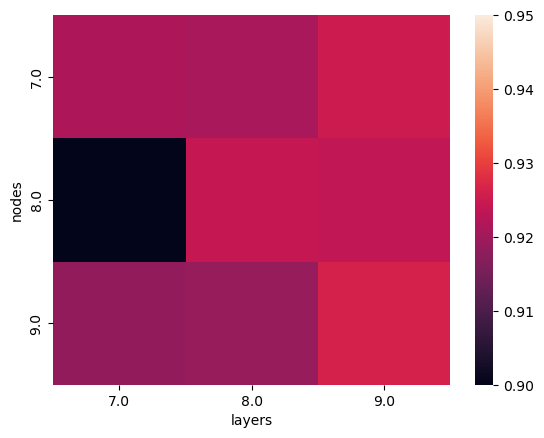

In [14]:
import seaborn as sns
myarray = np.array(results)

data = pd.DataFrame({'nodes': myarray[:,0], 'layers': myarray[:,1], 'Z': myarray[:,3]})
data_pivoted = data.pivot(index='nodes', columns='layers', values='Z')
ax = sns.heatmap(data_pivoted, vmin=0.9, vmax=0.95)
plt.show()
